<h1><center> M.Tech (Data Science and Engineering) </center></h1>
<h2><center>Information Retrieval</center></h2>
<h2><center>Assignment 2 - Evaluation of Classification Algorithms on Imbalanced Data</center></h2>

## Question
## A. Search for a dataset containing imbalanced classes for classification analysis.
There are many datasets containing imbalanced classes for classification analysis in various domains such as Credit Card Fraud Detection, Medical Diagnosis, Customer Churn Prediction, Text Prediction and many other datasets which are available on Kaggle or the UCI Machine Learning Repository.

We would be using the Credit Card Fraud Detection dataset for this assignment.This dataset contains transactions made by credit cards in September 2013 by European cardholders. It consists of numerical input variables that are the result of a PCA transformation due to confidentiality issues. Features V1, V2, ..., V28 are the principal components obtained with PCA, and the only features that have not been transformed with PCA are 'Time' and 'Amount'. 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 'Amount' is the transaction amount. 'Class' is the target variable, and it takes the value 1 in case of fraud and 0 otherwise.

## B.
## 1) Implement Python functions to handle class imbalance and train classifiers such as Naive Bayes and KNN on the imbalanced dataset. Evaluate the classifiers using performance metrics adjusted for imbalanced data, such as F1-score, precision-recall curves, and ROC-AUC.

In [1]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_recall_curve, auc, roc_curve
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
negative,positive =np.bincount(df['Class'])
total=negative+positive
print('Total: ',total)
print('Positive: ', positive, '-> ({:.2f}'.format(100*positive/total),'% of total)')


Total:  284807
Positive:  492 -> (0.17 % of total)


In [5]:
# Split data into features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Function to handle class imbalance using oversampling
def handle_imbalance(X_train, y_train):
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
    return X_resampled, y_resampled

In [7]:
# Train Naive Bayes classifier
def train_naive_bayes(X_train, y_train):
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    return nb

In [8]:
# Train KNN classifier
def train_knn(X_train, y_train):
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    return knn

In [9]:
# Evaluate classifiers
def evaluate_classifier(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])
    pr_auc = auc(recall, precision)
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    return f1, precision, recall, pr_auc, fpr, tpr, roc_auc

In [10]:
# Handle class imbalance
X_train_resampled, y_train_resampled = handle_imbalance(X_train, y_train)

In [11]:
# Train and evaluate Naive Bayes classifier
nb_classifier = train_naive_bayes(X_train_resampled, y_train_resampled)
nb_f1, nb_precision, nb_recall, nb_pr_auc, nb_fpr, nb_tpr, nb_roc_auc = evaluate_classifier(nb_classifier, X_test, y_test)

# Train and evaluate KNN classifier
knn_classifier = train_knn(X_train_resampled, y_train_resampled)
knn_f1, knn_precision, knn_recall, knn_pr_auc, knn_fpr, knn_tpr, knn_roc_auc = evaluate_classifier(knn_classifier, X_test, y_test)

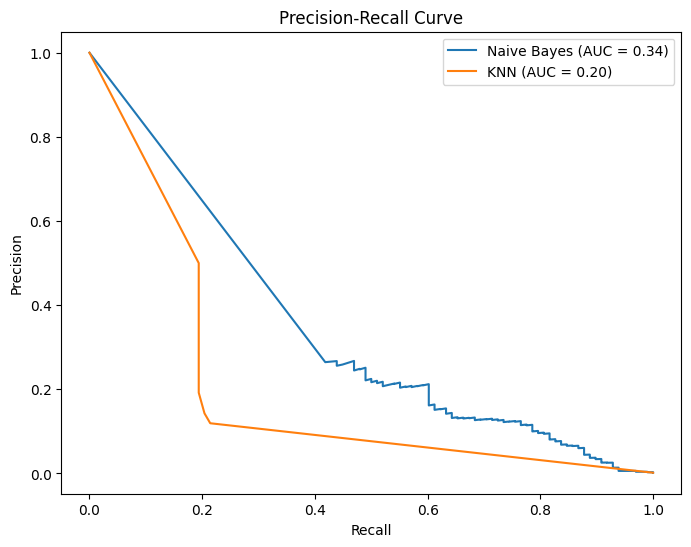

In [12]:
# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(nb_recall, nb_precision, label=f'Naive Bayes (AUC = {nb_pr_auc:.2f})')
plt.plot(knn_recall, knn_precision, label=f'KNN (AUC = {knn_pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

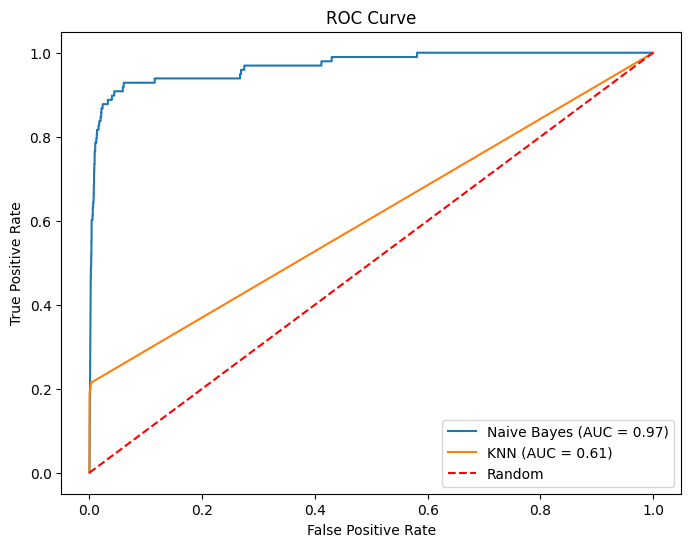

In [13]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_roc_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [14]:
print(f'Naive Bayes F1-score: {nb_f1:.4f}')
print(f'KNN F1-score: {knn_f1:.4f}')

Naive Bayes F1-score: 0.2164
KNN F1-score: 0.1929


##2) Discuss the challenges of dealing with imbalanced data in classification tasks and compare the performance of Naive Bayes and KNN classifiers in handling imbalanced datasets. (4 marks)



Dealing with imbalanced datasets in classification tasks can be challenging, as most classifiers assume an equal distribution of classes and tend to be biased towards the majority class. This can lead to poor performance in detecting the minority class, which is often the class of interest. Here are some key challenges and considerations when handling imbalanced datasets:

* Class imbalance skew:
When the classes are highly imbalanced, the classifier may simply learn to categorize all instances as the majority class, leading to high accuracy but poor performance on the minority class.
* Overfitting/Underfitting:
Imbalanced datasets can lead to overfitting or underfitting issues, depending on the classifier and the degree of imbalance.
* Evaluation metrics:
Accuracy is not a suitable metric for imbalanced datasets, as a high accuracy can be achieved by simply predicting the majority class. Other metrics like precision, recall, F1-score, and area under the ROC curve (AUC-ROC) are more appropriate.
From the provided precision-recall curve and ROC curve, we can compare the performance of Naive Bayes and KNN classifiers in handling the imbalanced dataset:

**Precision-Recall Curve:**
The Naive Bayes classifier (AUC = 0.34) has a higher overall precision than KNN (AUC = 0.20) across most recall values, indicating better performance in identifying positive instances (minority class) while minimizing false positives.
However, the precision-recall curve for KNN suggests that it may perform better at very high recall values, but at the cost of lower precision.

**ROC Curve:**
The Naive Bayes classifier (AUC = 0.97) has a much higher AUC-ROC than KNN (AUC = 0.61), indicating better overall performance in separating the positive and negative classes.
The ROC curve for Naive Bayes is closer to the top-left corner, which is the ideal scenario for a good classifier.

**F1-Score:**
The Naive Bayes classifier has a higher F1-score of 0.2164 compared to KNN's F1-score of 0.1929, suggesting better overall performance in balancing precision and recall.

Based on this information, the Naive Bayes classifier appears to perform better than KNN in handling this imbalanced dataset. However, it's important to note that these results may vary depending on the specific dataset and problem domain.

To improve performance on imbalanced datasets, techniques like oversampling, undersampling, or using ensemble methods like bagging or boosting can be employed. Additionally, adjusting the classification threshold or using cost-sensitive learning can help optimize the classifier for the minority class.